## Final Project Submission

Please fill out:
* Student name: Sabina Bains
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL: 


In [1]:
# Import Standard Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
import statistics
import os
%matplotlib inline

Notes:

imdb variable explanation: https://www.imdb.com/interfaces/

In [2]:
#Viewing and changing filenames for easier file importing

filenames = os.listdir('/Users/sabinabains/Desktop/dsci/Phase1/Phase1Project/dsc-phase-1-project/zippedData')
fullname = []

for file in filenames:
    fullname.append('zippeddata/'+file)
    
for num, name in enumerate(fullname):
    print(num, name)

0 zippeddata/imdb.title.crew.csv.gz
1 zippeddata/imdb.title.basics.tsv.gz
2 zippeddata/tmdb.movies.csv.gz
3 zippeddata/imdb.title.akas.csv.gz
4 zippeddata/imdb.title.ratings.csv.gz
5 zippeddata/imdb.name.basics.csv.gz
6 zippeddata/rt.reviews.tsv.gz
7 zippeddata/imdb.title.basics.csv.gz
8 zippeddata/rt.movie_info.tsv.gz
9 zippeddata/tn.movie_budgets.csv.gz
10 zippeddata/bom.movie_gross.csv.gz
11 zippeddata/imdb.title.principals.csv.gz


# SUGGESTION #1:

## Focus on creating movies in the X, Y, or Z Genre

- These Genres have the highest average rating


### Notes:
    -We should filter on whether each individual IMDB rating has >30? count
    -Should filter on how many average ratings are in each genre (>10?)


In [3]:
# Importing Ratings Data
ratings = pd.read_csv(fullname[4])

In [4]:
# Importing Genre Data and Filtering on Type = Movie
genres = pd.read_csv(fullname[1],sep="\t",dtype=object)
genres = genres.loc[genres['titleType']=='movie']

In [5]:
# Merging genre column to ratings info
imdb = pd.merge(ratings, genres, on='tconst', how='inner')

#checking for duplicates and N/A's
imdb.isna().sum()
imdb.duplicated().sum()

0

In [6]:
#### QUESTION - Should we filter out low numvotes? If so use this code
imdb['numvotes'].describe().astype(int)
imdb = imdb.loc[imdb['numvotes'] > 50]

In [7]:
# # Filtering out Columns not needed
# cols_to_keep = ['tconst','averagerating','genres']
# imdb = imdb[cols_to_keep]

In [8]:
#Since the genre column has multiple tags, I am splitting into multiple columns by "," separator
imdb_split = imdb['genres'].str.split(',', expand=True).add_prefix('genre').fillna('')
imdb = imdb.join(imdb_split)

In [9]:
#Creating Deduplicated list of Genres to use as Keys for Dictionary
genre_list = imdb.genres.str.split(',').to_list()
genre_list = list(set(list(chain.from_iterable(genre_list))))

In [10]:
#creating dictionary to map ratings to genres
ratings_dict={}
for item in genre_list:
    ratings_dict[item] = []

In [11]:
# Appending Average Rating to Dictionary of Genres
for genre in genre_list:
    for index, row in imdb.iterrows():
        if imdb['genre0'][index] == genre:
            ratings_dict[row['genre0']].append(row['averagerating'])
        elif imdb['genre1'][index] == genre:
            ratings_dict[row['genre1']].append(row['averagerating'])
        elif imdb['genre2'][index] == genre:
            ratings_dict[row['genre2']].append(row['averagerating'])

In [12]:
# # previewing dictionary
# for i in ratings_dict:
#     print(i, ratings_dict[i][0:5])

In [13]:
# count of movies in each genre
count_dict = ratings_dict.copy()

for i in ratings_dict:
    count_dict[i] = len(ratings_dict[i])

In [14]:
for i in ratings_dict:
    ratings_dict[i] = statistics.mean(ratings_dict[i])
# ratings_dict

In [150]:
df = pd.DataFrame(ratings_dict,index=['Average Rating'])
df = df.transpose()
df = df.reset_index()

In [151]:
df2 = pd.DataFrame(count_dict,index=['Count'])
df2 = df2.transpose()
df2 = df2.reset_index()

In [152]:
df3 = pd.merge(df,df2, on="index")

In [148]:
df4 = df3.loc[df3['Count'] >= 10].reset_index()

In [153]:
df5 = df4.sort_values('Average Rating', ascending = False)

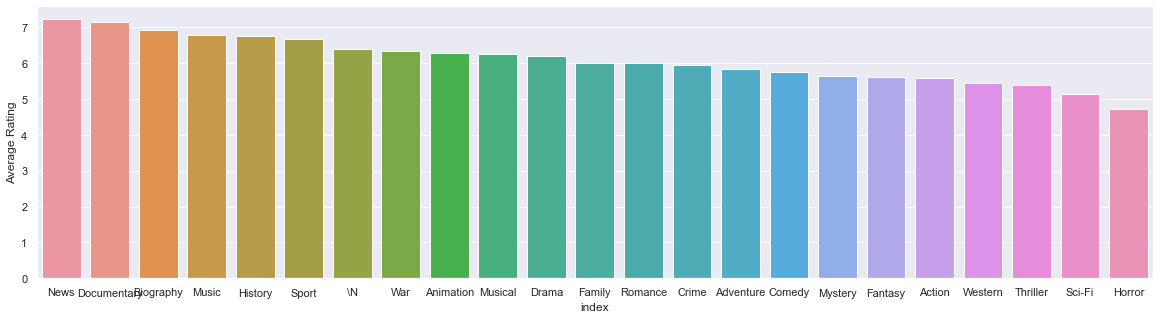

In [147]:
# who v/s fare barplot
sns.barplot(x = 'index',
            y = 'Average Rating',
            data = df5)
 
# Show the plot
sns.set(rc={'figure.figsize':(20,5)})
plt.show()

In [45]:
# adding additional insights to movies in these genres
akas = pd.read_csv(fullname[3])
crew = pd.read_csv(fullname[0])
people = pd.read_csv(fullname[5])
akas.rename(columns={'title_id':'tconst'}, inplace = True)

In [46]:
people.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [43]:
df = pd.merge(imdb,akas,how='left')
df = pd.merge(df,crew,how='left')
df

,tconst,averagerating,numvotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,genre2,ordering,title,region,language,types,attributes,is_original_title,directors,writers
0,tt10384606,8.9,559,movie,Borderless,Borderless,0,2019,\N,87,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nm9932562,nm9250842",NaN
1,tt1043726,4.2,50352,movie,The Legend of Hercules,The Legend of Hercules,0,2014,\N,99,...,Fantasy,10.0,The Legend of Hercules,NaN,NaN,original,NaN,1.0,nm0001317,"nm0393517,nm0316417,nm0001317,nm1048866"
2,tt1043726,4.2,50352,movie,The Legend of Hercules,The Legend of Hercules,0,2014,\N,99,...,Fantasy,11.0,Hércules - A Lenda Começa,PT,NaN,imdbDisplay,NaN,0.0,nm0001317,"nm0393517,nm0316417,nm0001317,nm1048866"
3,tt1043726,4.2,50352,movie,The Legend of Hercules,The Legend of Hercules,0,2014,\N,99,...,Fantasy,12.0,Za Herakuresu,JP,NaN,imdbDisplay,NaN,0.0,nm0001317,"nm0393517,nm0316417,nm0001317,nm1048866"
4,tt1043726,4.2,50352,movie,The Legend of Hercules,The Legend of Hercules,0,2014,\N,99,...,Fantasy,13.0,Legjenda e Herkulit,AL,NaN,imdbDisplay,NaN,0.0,nm0001317,"nm0393517,nm0316417,nm0001317,nm1048866"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202507,tt9575726,7.7,161,movie,And All Their Men,Ir visi ju vyrai,0,2019,\N,108,...,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nm3406099,"nm3556602,nm1802395"
202508,tt9576110,6.8,65,movie,J'veux du soleil,J'veux du soleil,0,2019,\N,76,...,,1.0,J'veux du soleil,FR,NaN,imdbDisplay,NaN,0.0,"nm2418217,nm7837906",NaN
202509,tt9576110,6.8,65,movie,J'veux du soleil,J'veux du soleil,0,2019,\N,76,...,,2.0,J'veux du soleil,NaN,NaN,original,NaN,1.0,"nm2418217,nm7837906",NaN
202510,tt9668598,5.5,317,movie,Musabbar,Musabbar,0,2019,\N,98,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"nm10430002,nm10430001","nm10430001,nm10430015"


In [36]:
def top_in_genre(df,genre):
    df1 = df.copy()
    df1 = df1.loc[df1['genres'].str.contains(genre)]
    df1 = df1.sort_values(by='averagerating',ascending=False).head()
    return df1

In [41]:
top_in_genre(imdb,'Fantasy')

,tconst,averagerating,numvotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre0,genre1,genre2
12920,tt3259484,8.8,64,movie,Pop Meets the Void,Pop Meets the Void,0,2015,\N,88,"Comedy,Fantasy,Music",Comedy,Fantasy,Music
25249,tt7984734,8.7,326,movie,The Lighthouse,The Lighthouse,0,2019,\N,109,"Drama,Fantasy,Horror",Drama,Fantasy,Horror
36301,tt2231681,8.6,52,movie,Welcome to Nowhere (Bullet Hole Road),Welcome to Nowhere (Bullet Hole Road),0,2012,\N,55,Fantasy,Fantasy,,
20958,tt8368032,8.6,1505,movie,Miss Granny,Miss Granny,0,2018,\N,120,"Comedy,Fantasy,Music",Comedy,Fantasy,Music
52757,tt5575408,8.6,467,movie,Mushi-Shi: Bell Droplets,Mushi-Shi Zoku Shou: Suzu no Shizuku,0,2015,\N,47,"Animation,Fantasy",Animation,Fantasy,


# SUGGESTION # 2:

## Consider hiring the below directors / writers:

- join nconst with ratings to see which writers / directors have the most success.

In [193]:
imdb

,tconst,averagerating,numvotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre0,genre1,genre2
1,tt10384606,8.9,559,movie,Borderless,Borderless,0,2019,\N,87,Documentary,Documentary,,
3,tt1043726,4.2,50352,movie,The Legend of Hercules,The Legend of Hercules,0,2014,\N,99,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
5,tt1069246,6.2,326,movie,Habana Eva,Habana Eva,0,2010,\N,106,"Comedy,Romance",Comedy,Romance,
6,tt1094666,7.0,1613,movie,The Hammer,Hamill,0,2010,\N,108,"Biography,Drama,Sport",Biography,Drama,Sport
7,tt1130982,6.4,571,movie,The Night Clerk,Avant l'aube,0,2011,\N,104,"Drama,Thriller",Drama,Thriller,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73049,tt9558612,3.7,4057,movie,PM Narendra Modi,PM Narendra Modi,0,2019,\N,136,"Biography,Drama",Biography,Drama,
73050,tt9575726,7.7,161,movie,And All Their Men,Ir visi ju vyrai,0,2019,\N,108,"Comedy,Drama,Romance",Comedy,Drama,Romance
73051,tt9576110,6.8,65,movie,J'veux du soleil,J'veux du soleil,0,2019,\N,76,Documentary,Documentary,,
73062,tt9668598,5.5,317,movie,Musabbar,Musabbar,0,2019,\N,98,"Horror,Thriller",Horror,Thriller,


In [191]:
df = pd.DataFrame({'nconst':['nm0061671','nm0061673','nm0061672'], 'value':[1,2,3]})
df 

,nconst,value
0,nm0061671,1
1,nm0061673,2
2,nm0061672,3


In [50]:
ids = {'nm0061671':'Bob',
      'nm0061672':'Bhupinder'}

In [192]:
ids = dict(zip(ids['nm0061671'], ids['nm0061672']))

df['test'] = df['nconst'].replace(ids, regex=True)
print (df)

KeyError: 'nm0061671'

In [55]:
dic = {"quick brown fox": "fox", "lazy dog": "dog", "u": "you"}
#Update as per comment
dic = {r"\b{}\b".format(k): v for k, v in dic.items()}

df = pd.DataFrame({"Text": ["The quick brown fox jumps over the lazy dog"]})
df["Text"] = df["Text"].replace(dic, regex=True)
print(df)

                         Text
0  The fox jumps over the dog


# SUGGESTION # 3:

## PROFit? LOL

In [66]:
profit = pd.read_csv(fullname[9])
gross = pd.read_csv(fullname[10])

In [74]:
profit

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [81]:
# DATA CLEANING

# Removing , and $ from dollar columns to turn into type int
profit.columns
profit_cols = ['production_budget', 'domestic_gross','worldwide_gross']
for i in profit_cols:
    profit[i]=profit[i].str.replace('$','')
    profit[i]=profit[i].str.replace(',','').astype(int)
profit['profit']=profit['worldwide_gross']-profit['production_budget']

In [107]:
imdb2 = imdb.rename(columns={'primaryTitle':'movie'})

In [130]:
test = pd.merge(imdb2,profit,how='left')
x = test.dropna()
x = x.sort_values(by='profit',ascending=False)

In [194]:
# Keepy Columns
# x_cols = ['tconst', 'averagerating', 'numvotes', 'movie', 'isAdult', 'startYear', 'runtimeMinutes',
#        'genres', 'genre0', 'genre1', 'genre2', 'profit']
# x = x[x_cols]
x

,tconst,averagerating,numvotes,titleType,movie,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre0,genre1,genre2,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
35600,tt4154756,8.5,670926,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018,\N,149,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,7.0,"Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,1.748134e+09
3788,tt0369610,7.0,539338,movie,Jurassic World,Jurassic World,0,2015,\N,124,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,1.433855e+09
7146,tt2820852,7.2,335074,movie,Furious 7,Fast & Furious 7,0,2015,\N,137,"Action,Adventure,Thriller",Action,Adventure,Thriller,67.0,"Apr 3, 2015",190000000.0,353007020.0,1.518723e+09,1.328723e+09
23913,tt0848228,8.1,1183655,movie,The Avengers,The Avengers,0,2012,\N,143,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,27.0,"May 4, 2012",225000000.0,623279547.0,1.517936e+09,1.292936e+09
20703,tt2905856,6.2,71,movie,Black Panther,Schwarzer Panther,0,2014,\N,79,"Drama,Romance",Drama,Romance,,42.0,"Feb 16, 2018",200000000.0,700059566.0,1.348258e+09,1.148258e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26265,tt4192918,8.8,53,movie,The Promise,The Promise,0,2017,\N,115,Comedy,Comedy,,,78.0,"Apr 21, 2017",90000000.0,8224288.0,1.055142e+07,-7.944858e+07
21965,tt7232438,6.1,629,movie,The Promise,Puen Tee Raluek,0,2017,\N,114,"Drama,Horror,Thriller",Drama,Horror,Thriller,78.0,"Apr 21, 2017",90000000.0,8224288.0,1.055142e+07,-7.944858e+07
23683,tt4776998,6.1,164555,movie,The Promise,The Promise,0,2016,\N,133,"Action,Adventure,Drama",Action,Adventure,Drama,78.0,"Apr 21, 2017",90000000.0,8224288.0,1.055142e+07,-7.944858e+07
28687,tt5519340,6.4,147834,movie,Bright,Bright,0,2017,\N,117,"Action,Fantasy,Thriller",Action,Fantasy,Thriller,80.0,"Dec 13, 2017",90000000.0,0.0,0.000000e+00,-9.000000e+07


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='averagerating', ylabel='profit'>

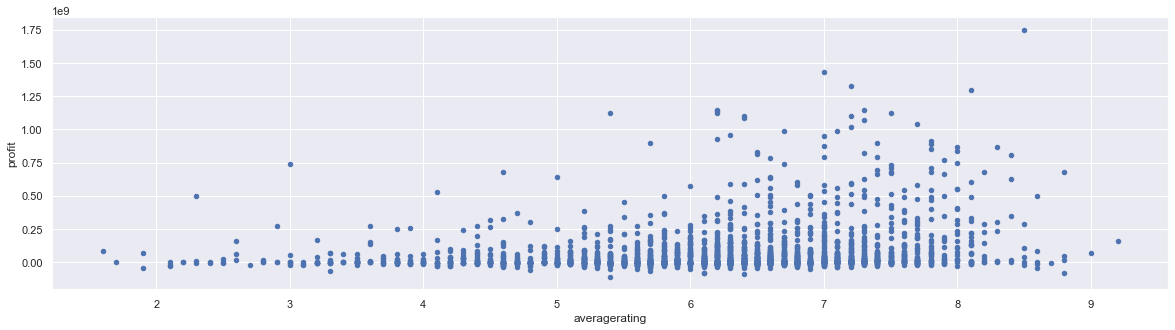

In [195]:
x.plot('averagerating','profit',kind='scatter')

# trying out other DFs besides IMDB

In [160]:
x

,tconst,averagerating,numvotes,titleType,movie,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,genre0,genre1,genre2,id,release_date,production_budget,domestic_gross,worldwide_gross,profit
35600,tt4154756,8.5,670926,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018,\N,149,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,7.0,"Apr 27, 2018",300000000.0,678815482.0,2.048134e+09,1.748134e+09
3788,tt0369610,7.0,539338,movie,Jurassic World,Jurassic World,0,2015,\N,124,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,34.0,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,1.433855e+09
7146,tt2820852,7.2,335074,movie,Furious 7,Fast & Furious 7,0,2015,\N,137,"Action,Adventure,Thriller",Action,Adventure,Thriller,67.0,"Apr 3, 2015",190000000.0,353007020.0,1.518723e+09,1.328723e+09
23913,tt0848228,8.1,1183655,movie,The Avengers,The Avengers,0,2012,\N,143,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,27.0,"May 4, 2012",225000000.0,623279547.0,1.517936e+09,1.292936e+09
20703,tt2905856,6.2,71,movie,Black Panther,Schwarzer Panther,0,2014,\N,79,"Drama,Romance",Drama,Romance,,42.0,"Feb 16, 2018",200000000.0,700059566.0,1.348258e+09,1.148258e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26265,tt4192918,8.8,53,movie,The Promise,The Promise,0,2017,\N,115,Comedy,Comedy,,,78.0,"Apr 21, 2017",90000000.0,8224288.0,1.055142e+07,-7.944858e+07
21965,tt7232438,6.1,629,movie,The Promise,Puen Tee Raluek,0,2017,\N,114,"Drama,Horror,Thriller",Drama,Horror,Thriller,78.0,"Apr 21, 2017",90000000.0,8224288.0,1.055142e+07,-7.944858e+07
23683,tt4776998,6.1,164555,movie,The Promise,The Promise,0,2016,\N,133,"Action,Adventure,Drama",Action,Adventure,Drama,78.0,"Apr 21, 2017",90000000.0,8224288.0,1.055142e+07,-7.944858e+07
28687,tt5519340,6.4,147834,movie,Bright,Bright,0,2017,\N,117,"Action,Fantasy,Thriller",Action,Fantasy,Thriller,80.0,"Dec 13, 2017",90000000.0,0.0,0.000000e+00,-9.000000e+07


In [166]:
tmd = pd.read_csv(fullname[2])
tmd = tmd.rename(columns={'original_title':'movie'})

y = pd.merge(x,tmd,on='movie',how='inner')

,tconst,averagerating,numvotes,titleType,movie,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,profit,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,tt4154756,8.5,670926,movie,Avengers: Infinity War,Avengers: Infinity War,0,2018,\N,149,...,1.748134e+09,23811,"[12, 28, 14]",299536,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
1,tt0369610,7.0,539338,movie,Jurassic World,Jurassic World,0,2015,\N,124,...,1.433855e+09,14193,"[28, 12, 878, 53]",135397,en,20.709,2015-06-12,Jurassic World,6.6,14056
2,tt2820852,7.2,335074,movie,Furious 7,Fast & Furious 7,0,2015,\N,137,...,1.328723e+09,14196,"[28, 80, 53]",168259,en,20.396,2015-04-03,Furious 7,7.3,6538
3,tt0848228,8.1,1183655,movie,The Avengers,The Avengers,0,2012,\N,143,...,1.292936e+09,5179,"[878, 28, 12]",24428,en,50.289,2012-05-04,The Avengers,7.6,19673
4,tt0848228,8.1,1183655,movie,The Avengers,The Avengers,0,2012,\N,143,...,-1.141458e+07,5179,"[878, 28, 12]",24428,en,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,tt4776998,6.1,164555,movie,The Promise,The Promise,0,2016,\N,133,...,-7.944858e+07,10075,[],408852,en,0.600,2013-10-16,The Promise,9.0,1
2662,tt4776998,6.1,164555,movie,The Promise,The Promise,0,2016,\N,133,...,-7.944858e+07,17560,"[36, 10749, 18]",354859,en,10.158,2017-04-21,The Promise,7.1,195
2663,tt4776998,6.1,164555,movie,The Promise,The Promise,0,2016,\N,133,...,-7.944858e+07,20848,"[36, 10749, 18]",354859,en,10.158,2017-04-21,The Promise,7.1,195
2664,tt5519340,6.4,147834,movie,Bright,Bright,0,2017,\N,117,...,-9.000000e+07,20698,"[28, 80, 14]",400106,en,15.677,2017-12-22,Bright,6.2,3181


In [171]:
cols = ['tconst', 'averagerating', 'numvotes', 'popularity',
       'vote_average', 'vote_count']
y2 = y[cols]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 0 to 2665
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         2666 non-null   object 
 1   averagerating  2666 non-null   float64
 2   numvotes       2666 non-null   int64  
 3   popularity     2666 non-null   float64
 4   vote_average   2666 non-null   float64
 5   vote_count     2666 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 145.8+ KB


In [185]:
y3 = y2.loc[y2['vote_count'] > 100]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='popularity', ylabel='averagerating'>

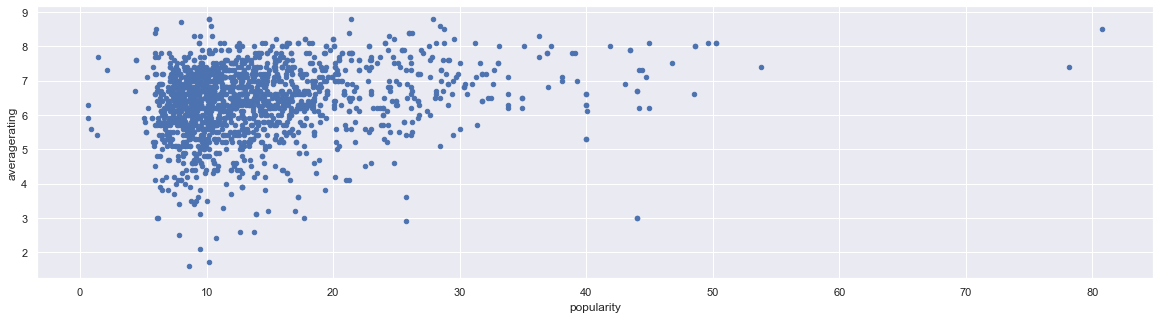

In [186]:
y3.plot('popularity','averagerating',kind='scatter')

In [ ]:
# for the final lets create an overall tconst mapping file with title names, and then map those to the two ratings
# that we have available based on either name or tconst ? not gonna use RT because no name mention